<a href="https://colab.research.google.com/github/MagdalenaKumala/MagdalenaKumala.github.io/blob/main/Netflix_przewidywanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wykorzystanie sztucznych sieci neuronowych do przewidywania cen akcji firmy Netflix.**


**Projekt przygotowały:**

Zuzanna Kołodziejczyk, Magdalena Kumala

**Przedmiot:** Elementy sztucznej inteligencji

**Kierunek:** Informatyka i ekonometria, rok 2, grupa 2


---



# **Część teoretyczna:**

**Opis projektu**

Tematem naszego projektu jest prognoza cen wyjścia akcji firmy Netflix na giełdzie. 

Do rozwiązania tego zagdanienia wykorzystujemy sztuczne sieci neuronowe. Prognozowanie przeprowadzimy w oparciu o 60 dni giełdowych, na podstawie tych danych nasz model będzie się uczył a następnie przewidywał cenę akcji na jeden dzień w przód. 

W naszej pracy wykorzystujemy język programowania Python. 


---



**Sieci neuronowe**

SSN to narzędzie obliczeniowe imitujące w sposób uproszczony działanie ludzkiego mózgu. Składają się one z połączonych ze sobą obiektów umownie zwanych neuronami. Istotną cechą sieci jest możliwość uczenia się - tj. modyfikowania parametrów charakteryzujących poszczególne neurony w taki sposób, by zwiększyć efektywność sieci przy rozwiązywaniu zadań określonego typu. Składają się z trzech typów warstw: wejściowej, ukrytej oraz wyjściowej. Sieć neuronowa może składać się z dowolnej liczby warstw i zwykle tworzy ją ich wiele. Działanie takiej sieci polega na liczeniu odpowiedzi neuronów w kolejnych warstwach - najpierw w pierwszej, do której trafiają sygnały z wejść sieci, potem (na podstawie wyników pierwszej warstwy) liczymy odpowiedzi drugiej warstwy neuronów. To, co wytwarza ostatnia warstwa, to tzw. dane wyjściowe systemu.



---



# **Część praktyczna:**

In [ ]:
#Importuje biblioteki z których będziemy korzystać:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Wybieram dane, których będziemy potrzebować:
df = web.DataReader('NFLX', data_source='yahoo', start='2016-01-01', end='2021-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,110.000000,105.209999,109.000000,109.959999,20794800,109.959999
2016-01-05,110.580002,105.849998,110.449997,107.660004,17664600,107.660004
2016-01-06,117.910004,104.959999,105.290001,117.680000,33045700,117.680000
2016-01-07,122.180000,112.290001,116.360001,114.559998,33636700,114.559998
2016-01-08,117.720001,111.099998,116.330002,111.389999,18067100,111.389999
...,...,...,...,...,...,...
2021-03-01,552.140015,542.000000,545.570007,550.640015,3041400,550.640015
2021-03-02,556.989990,546.020020,553.340027,547.820007,3039100,547.820007
2021-03-03,548.010010,517.809998,545.929993,520.700012,5355500,520.700012


In [ ]:
#Zebranie liczby kolumn i wierszy naszej bazy:
df.shape

(1302, 6)

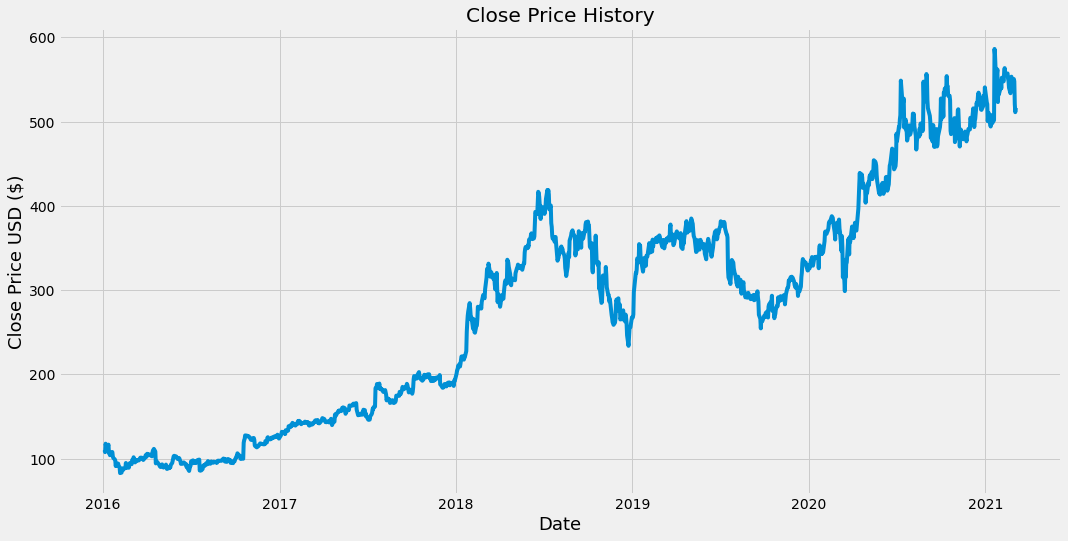

In [ ]:
#Wykres obrazujący nasze dane:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Widzimy, że ceny akcji rosły z każdym rokiem, a zwłaszcza w zeszłym roku.

In [ ]:
#Wyodrębnienie kolumny "Close"
data = df.filter(['Close'])
#Modyfikacja danych
dataset = data.values
#Zebranie liczby rzędów do naszego uczącego modelu: 
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1042

In [ ]:
#Skalujemy nasze dane:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0539569 ],
       [0.04938934],
       [0.06928805],
       ...,
       [0.86964549],
       [0.85095817],
       [0.86108627]])

In [ ]:
#Tworzymy model uczący:
train_data = scaled_data[0:training_data_len, :]
#Podział danych:
x_train = []
y_train = []

#Na podstawie ostatnich 60 danych nasz model będzie się uczył i przewidywał
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

#Jeżeli zmienimy i damy i<=61 to wtedy wyświetlają nam się dwie macierze
#jedna to przejście z i<=60 a druga to przejście i<=61

[array([0.0539569 , 0.04938934, 0.06928805, 0.06309204, 0.05679674,
       0.06390626, 0.06710356, 0.04720484, 0.04819779, 0.04220038,
       0.04984609, 0.0495482 , 0.0388442 , 0.03560719, 0.03242975,
       0.02986794, 0.01660213, 0.02307616, 0.01797239, 0.02244066,
       0.01727732, 0.0157879 , 0.01374242, 0.        , 0.00105252,
       0.0066329 , 0.01124019, 0.0070698 , 0.009155  , 0.01243174,
       0.02377123, 0.01529142, 0.0127892 , 0.01815112, 0.01257075,
       0.01751564, 0.02331446, 0.0238308 , 0.02109026, 0.03080131,
       0.02943104, 0.03006652, 0.03731506, 0.02522092, 0.0266905 ,
       0.03020554, 0.02893456, 0.02953034, 0.0304637 , 0.02992751,
       0.0328865 , 0.03362129, 0.03640155, 0.03628239, 0.03385959,
       0.03336311, 0.03092046, 0.03658027, 0.0423791 , 0.03852646])]
[0.03860590098296385]

[array([0.0539569 , 0.04938934, 0.06928805, 0.06309204, 0.05679674,
       0.06390626, 0.06710356, 0.04720484, 0.04819779, 0.04220038,
       0.04984609, 0.0495482 , 0.03

In [ ]:
#Modyfikacja x_train oraz y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Modyfikacja danych
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(982, 60, 1)

In [ ]:
#Budowanie modelu LSTM
model = Sequential()
#Tworzymy warstwy oraz neurony (dodajemy 50 neuronów)
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25)) #Warstwa z 25 neuronami
model.add(Dense(1)) #Warstwa z 1 neuronem

In [ ]:
#Kompilacja modelu:
#Funkcja loss używana jest, by ocenić jak zgodny jest model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Sprawdzanie modelu:
model.fit(x_train, y_train, batch_size=1, epochs=1)

982/982 [==============================] - 27s 24ms/step - loss: 0.0053


In [ ]:
#Tworzymy sprawdzające dane:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Modyfikujemy dane do numpy array:
x_test = np.array(x_test)

In [ ]:
#Modyfikujemy dane:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Zebranie prognozowanych cen akcji przez model:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Miara trafności prognozy - błąd RMSE
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


29.568732932682547

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


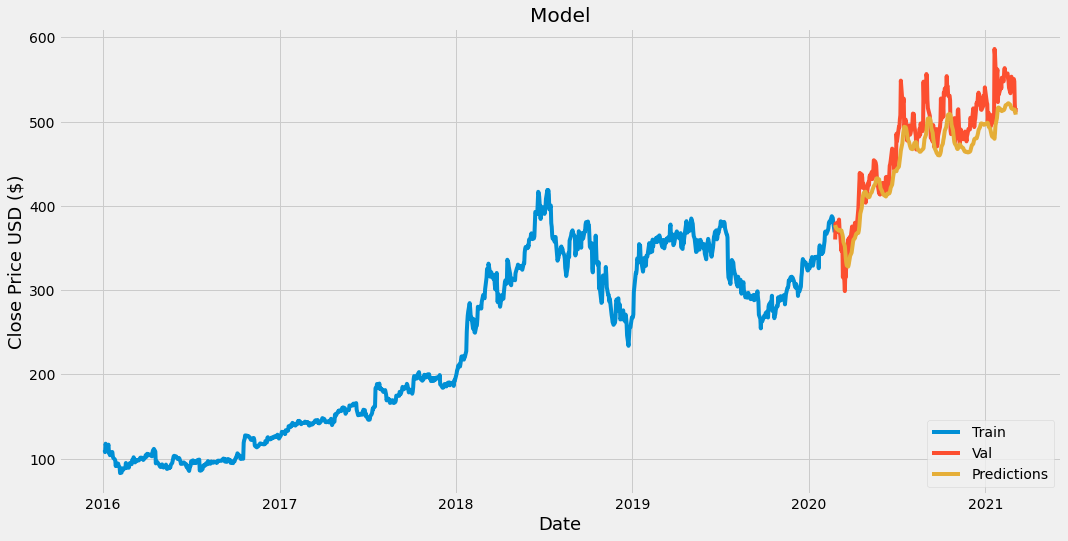

In [ ]:
#Wykres:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#Ciemny pomarańczowy - dane prawdziwe
#Jasny pomarańczowe - dane wytworzone przez model

In [ ]:
#Pokazanie cen właściwych oraz przewidzianych:
valid
#Właściwe dane i przewidziane:

,Close,Predictions
Date,,
2020-02-25,360.089996,377.288788
2020-02-26,379.239990,375.098206
2020-02-27,371.709991,373.954529
2020-02-28,369.029999,372.758575
2020-03-02,381.049988,371.446442
...,...,...
2021-03-01,550.640015,514.248779
2021-03-02,547.820007,514.209961
2021-03-03,520.700012,514.316895


In [ ]:
#Proba przewidzenia
netflix_quote = web.DataReader('NFLX', data_source='yahoo', start='2016-01-01', end='2021-03-07')
#Create a new dateframe
new_df = netflix_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 adn 1
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predisted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[504.47162]]


In [ ]:
netflix_quote2 = web.DataReader('NFLX', data_source='yahoo', start='2021-03-08', end='2021-03-08')
print(netflix_quote2['Close'])

Date
2021-03-08    493.329987
Name: Close, dtype: float64




---



# **Wnioski**

Wykorzystując sieci neuronowe do rozwiązywania problemów ekonomicznych musimy pamiętać, że otrzymane wyniki są zwykle raczej jakościowe, aniżeli ilościowe. Oznacza to, że wypracowane przez sieć rozwiązania są przybliżone. 
 
Obliczony przez nas błąd RMSE wynosi około 30, czyli średnio nasze prognozy różnią się od wartości rzeczywistej o 30$.
 
Dzięki tej informacji możemy więc wnioskować, że cena wyjścia Netflix'a 8 marca 2021 roku będzie wynosiła około 493,33$. 
 
Prognozę przeprowadziłyśmy na dzień, dla którego posiadamy rzeczywiste dane, w tym dniu odnotowano cenę wyjścia na poziomie 493,33$. Możemy porównać otrzymany przez nas wynik z rzeczywistą wartością i zauważamy, że w tym przypadku nasz model dokładnie przewidział tą wartość. 

# **Bibliografia**

**Literatura**
 
Poniżej znajduje się spis literatury, z której korzystałyśmy podczas opracowywania wybranego przez nas zagadnienia. Z tych artykułów zaczerpnęłyśmy głównie  wiedzę teoretyczną oraz zapoznałyśmy się ze schematem rozwiązania naszego zagadnienia.  
 
https://www.cire.pl/pliki/2/wykorzystaniesiecige.pdf artykuł dotyczący wykorzystania sztucznych sieci neuronowych do prognozowania cen na giełdzie energii.
 
https://winntbg.bg.agh.edu.pl/rozprawy/9848/full9848.pdf rozprawka doktorska dotycząca zastosowania sieci neuronowych do generowania strategi decyzyjnych (inwestycyjnych) na przykładzie Giełdy Papierów Wartościowych.
 
https://kcir.pwr.edu.pl/~witold/aiarr/2012_projekty/kghm/ projekt dotyczący prognozowania cen akcji spółki KGHM z wykorzystaniem sieci neuronowych.

http://www.iisi.pcz.pl/nn/wlasnosci.php - teoria